In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from mom import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
df_dict = {}
candidate = ['SOL','XRP']#['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
for coin in candidate:
    try:
        df_dict[coin] = get_data(coin)
    except:
        pass

Start                         2022-01-01 00:00:00
End                           2023-11-08 01:00:00
Period                          676 days 02:00:00
Start Value                               10000.0
Min Value                             8856.794751
Max Value                            18518.095213
End Value                            16780.987729
Total Return [%]                        67.809877
Benchmark Return [%]                   -75.341647
Total Time Exposure [%]                 15.647726
Max Gross Exposure [%]                      100.0
Max Drawdown [%]                        22.795757
Max Drawdown Duration           238 days 10:00:00
Total Orders                                   66
Total Fees Paid                        198.479816
Total Trades                                   33
Win Rate [%]                            54.545455
Best Trade [%]                          34.692643
Worst Trade [%]                          -9.12529
Avg Winning Trade [%]                     6.79971


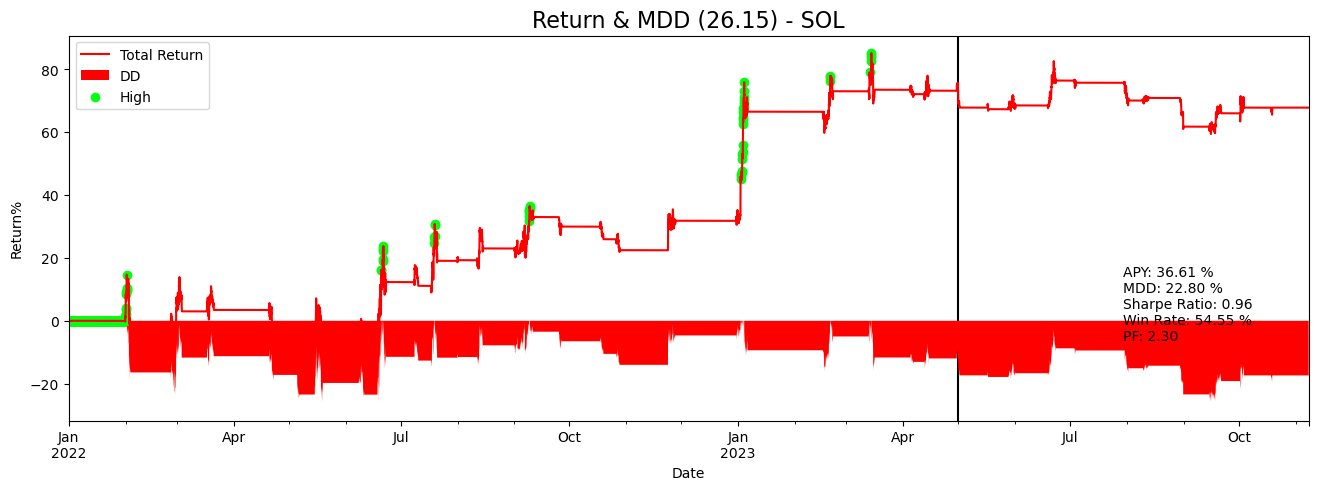

In [18]:
start = '2022-01-01'
sep = ''
end = ''

side = 'long'
# v2
params = {'window_l_k': 248, 'window_l_d': 136, 'window_s_k': 36, 'window_s_d': 36}
# sol 1h : 40,48,100,126,95
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

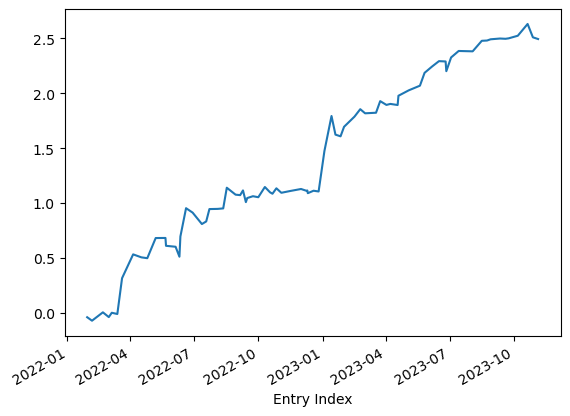

In [39]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

In [1]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['SOL','XRP']
sample_sets = [[start,end]]

for freq in ['5T','15T','30T','1h']:
    for direction in ['long']:
        params={
            'window_l_k': [36, 296, 4],
            'window_l_d': [36, 296, 4],
            'window_s_k': [36, 296, 4],
            'window_s_d': [36, 296, 4]}
        if direction == 'long':
            params['window_s_k'] = [36,37,1]
            params['window_s_d'] = [36,37,1]
        else:
            params['window_l_d'] = [36,37,1]
            params['window_l_k'] = [36,37,1]    
        config = {'freq':freq,'fee': 0.0003}
        multi_test = MultiTester(
            Strategy,
            get_data_func=get_data,
            params=params,
            config=config,
            symbol_list=symbol_list,
            start=start,
            end=end
            )

        all_params = multi_test.multi_params(symbol_list,sample_sets,direction=direction)
        trades, value_df = multi_test.multi_params_result(all_params)
    print(f'-------------------{freq} is done----------------------')